# One Fourth Labs Internship Interview Round 1 -- Programming Assessment


###### Importing libraries

In [1]:
from zipfile import ZipFile
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
from collections import OrderedDict

###### Extracting Dataset

In [2]:
data = "Character + Digits data.zip"
with ZipFile(data, 'r') as zip:
    zip.printdir()
    print(" Extracting all the files now...")
    zip.extractall()
    print("Done...!")

File Name                                             Modified             Size
Character + Digits data/                       2019-10-09 15:40:38            0
Character + Digits data/Readme.txt             2019-10-09 15:39:20          251
Character + Digits data/characters-digits-test.zip 2019-10-09 15:39:58      6198679
Character + Digits data/characters-digits-train.zip 2019-10-09 15:40:26     37085897
Character + Digits data/characters-digits-mapping.txt 2019-10-09 15:12:32          328
 Extracting all the files now...
Done...!


###### Extracting training data

In [3]:
train_data = "Character + Digits data/characters-digits-train.zip"

In [4]:
with ZipFile(train_data, 'r') as zip:
    zip.printdir()
    print(" Extracting all the files now...")
    zip.extractall()
    
    print("Done...!")

File Name                                             Modified             Size
characters-digits-train.csv                    2019-09-25 11:15:32    218619475
 Extracting all the files now...
Done...!


In [5]:
# Reading trainied data file
train_csv_data = pd.read_csv("characters-digits-train.csv")

In [6]:
# Let's see the training data
train_csv_data

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# In pandas DataFrame first row of data named as columns names of Dataframe. So, I had made a first row of traine_csv_data file
# to the duplicate_data.csv file and then append to the train_data
duplicate_data = pd.read_csv("duplicate_data .csv")

In [8]:
## Changing column names in both trained_csv_data and duplicate_data then only we have to append otherwise data will be noisy
for i in range(785):
        duplicate_data.rename( columns = {duplicate_data.columns[i]: i},inplace = True )
        train_csv_data.rename( columns = { train_csv_data.columns[i]:i}, inplace = True)
duplicate_data.rename( columns = {duplicate_data.columns[0]: "Label_ID" }, inplace = True)
train_csv_data.rename( columns = {train_csv_data.columns[0]: "Label_ID" }, inplace = True)


In [9]:
#Let's see train_csv_data now
train_csv_data

,Label_ID,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Let's see duplicate_data 
duplicate_data

,Label_ID,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#appending dataframes to train_data Dataframe
train_data = duplicate_data.append(train_csv_data)

In [12]:
train_data

,Label_ID,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Now let's see the length of the train_data
len(train_data)

112800

In [14]:
# For training we have to seperate Label_ID's and dataset. For that one I assigned to labels. Later I will drop
# train_data["Label_ID"] from train_data
labels = train_data["Label_ID"]

In [15]:
labels

0         45
0         36
1         43
2         15
3          4
          ..
112794    22
112795    17
112796    23
112797    31
112798     8
Name: Label_ID, Length: 112800, dtype: int64

In [16]:
# Now I'm removing train_data["Label_ID"] from train_data
train_data = train_data.drop(["Label_ID"], axis = 1)

In [17]:
# For training a model we don't has to use DataFrame for that one I'm converting to np.array
train_data = np.array(train_data)

In [18]:
# Let's see the shape of the array
train_data.shape

(112800, 784)

In [19]:
# For viewing the image we have convert it to 28x28 image size
train = np.reshape(train_data, (train_data.shape[0], 28,28))

In [20]:
# Now shape of the train is
train.shape

(112800, 28, 28)

In [21]:
# Also converting Label data also to np.array
labels = np.array(labels)

In [22]:
# Label Data 
labels

array([45, 36, 43, ..., 23, 31,  8], dtype=int64)

In [31]:
la = labels
la

array([45, 36, 43, ..., 23, 31,  8], dtype=int64)

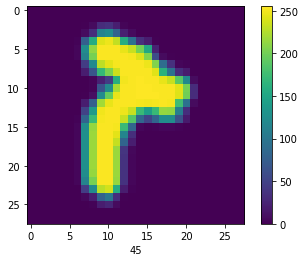

In [23]:
# Now lets see the first image of our data
plt.figure()
plt.imshow(train[0])
plt.xlabel(labels[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
# Scaling these values between 0 to 1. So, divide values by 255
train_images = train / 255

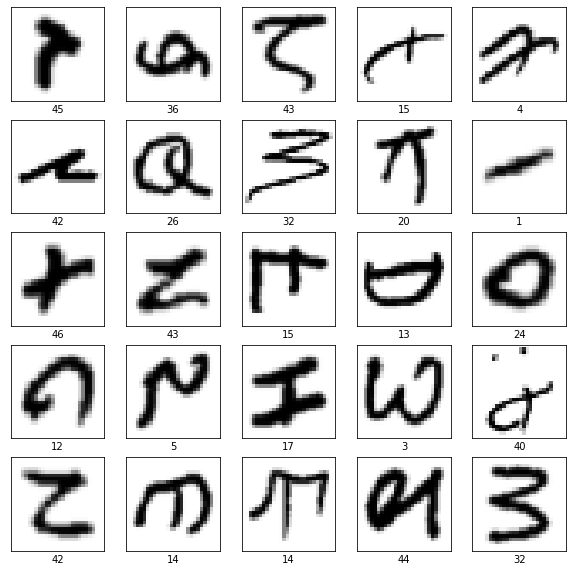

In [25]:
# Let's see the first 25 images and their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

### Building the neural network model

I had used TensorFlow and keras as backend for building neural network model

In [99]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(784, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(47, activation='softmax')
])

In [100]:
## Now I'm compiling my model with optimizer, loss and metrics
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
## Training the model
model.fit(train_images, la, epochs = 10)

Train on 112800 samples
Epoch 1/10
112800/112800 [==============================] - 35s 311us/sample - loss: 0.8112 - accuracy: 0.7455
Epoch 2/10
112800/112800 [==============================] - 35s 306us/sample - loss: 0.5015 - accuracy: 0.8283
Epoch 3/10
112800/112800 [==============================] - 35s 307us/sample - loss: 0.4265 - accuracy: 0.8492
Epoch 4/10
112800/112800 [==============================] - 34s 301us/sample - loss: 0.3818 - accuracy: 0.8621
Epoch 5/10
112800/112800 [==============================] - 35s 307us/sample - loss: 0.3493 - accuracy: 0.8721
Epoch 6/10
112800/112800 [==============================] - 34s 306us/sample - loss: 0.3253 - accuracy: 0.8784
Epoch 7/10
112800/112800 [==============================] - 34s 304us/sample - loss: 0.3050 - accuracy: 0.8840
Epoch 8/10
112800/112800 [==============================] - 35s 308us/sample - loss: 0.2908 - accuracy: 0.8885
Epoch 9/10
112800/112800 [==============================] - 34s 299us/sample - loss: 0.2

## Testing the Deep Learning model

In [33]:
## Reading test data from characters-digits-test.csv
test_csv_data = pd.read_csv("characters-digits-test.csv")

In [34]:
## Now let's see test_csv_data
test_csv_data

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18795,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18797,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# As mentioned above the first row is named as column names
test_duplicate = pd.read_csv("test_duplicate.csv")

In [36]:
# Let's see the test_duplicate
test_duplicate

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Changing column names both in test_csv_data and test_duplicate
for i in range(785):
        test_duplicate.rename( columns = {test_duplicate.columns[i]: i},inplace = True )
        test_csv_data.rename( columns = { test_csv_data.columns[i]:i}, inplace = True)
test_duplicate.rename( columns = {test_duplicate.columns[0]: "Label_ID" }, inplace = True)
test_csv_data.rename( columns = {test_csv_data.columns[0]: "Label_ID" }, inplace = True)


In [38]:
# Let's see the test_dulpicate
test_duplicate

,Label_ID,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Let's see test_csv_data
test_csv_data

,Label_ID,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18795,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18797,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Now appending to test_data
test_data = test_duplicate.append(test_csv_data)

In [41]:
# Let's see the test_data
test_data

,Label_ID,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18795,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18797,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Getting test labels from test_data
test_label = test_data["Label_ID"]

In [43]:
# Dropping test_data["Label_ID"] from test_data
test_data = test_data.drop(["Label_ID"], axis = 1)

In [44]:
# Converting numpy array, because test_data is a DataFrame
test_data = np.array(test_data)

In [45]:
# Converting numpy array, because test_label is a DataFrame
test_label = np.array(test_label)

In [46]:
# Now let's see test_data type and shape
type(test_data),test_data.shape

(numpy.ndarray, (18800, 784))

In [47]:
# Now reshaping to 18800x28x28
test_data = np.reshape(test_data,(test_data.shape[0],28,28))

### Now test_data is ready for testing the model

In [102]:
# Finding accuracy of the model
test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)

18800/1 - 3s - loss: 118.5676 - accuracy: 0.8382

Test accuracy: 0.8381915


In [49]:
# Finally predcting the model with test_data
predictions = model.predict(test_data)

In [50]:
# Let's see predictions[1] data  
predictions[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

###### np.argmax returns predicted label of test_dat. So, we have to convert it to either digits or letter using "chr" function

In [51]:
# Predictions returns the numpy array. So, I had used np.argmax function returns maximum value along the axis
np.argmax(predictions[1])

39

In [52]:
## Reading characters-digits-mapping.txt file and assigning it to labels dictionary
with open('characters-digits-mapping.txt', 'r') as file:
    labels = {}
    for line in file:
        line = line.split()
        if not line:
            continue
        labels[line[0]] = line[1:]

In [53]:
# Let's see one of predicted data out of 18800
d = chr(int(labels[str(np.argmax(predictions[random.randint(1,18800)]))][0]))

In [54]:
d

'R'

In [55]:
# I had created digit and vowel list for distinguishing 
digit = []
for i in range(48,58):
    digit.append(i)
vowel = ['a','e','i','o','u','A','E','I','U']

## Logic for Task 1, Task 2 and Task 3

###### By running the below cell repeatedly my model will predict 
###### Task 1 : Letter / Digit 
###### Task 2 : Even / Odd and Vowel / Consonant
###### Task3 : Character Classifier 

================================ TASK 1 ----------- Letter or Digit ------------ ================================ 


The Given image is -------> is a Letter 



 --------------------------------------////////\\\\\-------------------------------------------- 




=================== TASK 2 --------- Vowel or Consonant and Even or Odd Classifier --------- ===================

 
The Given image is -------> F is a Letter and is a Consonant 



 --------------------------------------////////\\\\\-------------------------------------------- 




================================== Task 3 ------ Character Classifier ------ ==================================== 


The Given image is ------->   F      is a Letter and is a Consonant 




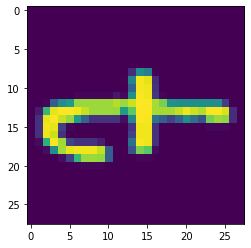

In [110]:
i = random.randint(1,18800)
predicted_data = np.argmax(predictions[i])
print("================================ TASK 1 ----------- Letter or Digit ------------ ================================ \n\n")
if int(labels[str(predicted_data)][0]) in digit:
    print("The Given image is -------> is Digit \n\n\n")
    
else:
    print("The Given image is -------> is a Letter \n\n\n")
print(" --------------------------------------////////\\\\\\\\\-------------------------------------------- \n\n\n\n")



print("=================== TASK 2 --------- Vowel or Consonant and Even or Odd Classifier --------- ===================\n\n ")

if int(labels[str(predicted_data)][0]) in digit:
    if int(chr(int(labels[str(predicted_data)][0]))) % 2 == 0:
        print("The Given image is ------->  is a Digit and it's a even number \n\n\n")
        
    else:
        print("The Given image is -------> is a Digit and it's a odd number \n\n\n")
        
elif chr(int(labels[str(predicted_data)][0])) in vowel:
    print("The Given image is -------> is a Letter and is a Vowel \n\n\n")
    
else:
    print("The Given image is ------->", chr(int(labels[str(predicted_data)][0])), "is a Letter and is a Consonant \n\n\n")

print(" --------------------------------------////////\\\\\\\\\-------------------------------------------- \n\n\n\n")
    

print("================================== Task 3 ------ Character Classifier ------ ==================================== \n\n")

if int(labels[str(predicted_data)][0]) in digit:
    if int(chr(int(labels[str(predicted_data)][0]))) % 2 == 0:
        print("The Given image is -------> ",chr(int(labels[str(predicted_data)][0]))," is a Digit and it's a even number \n\n")
        plt.imshow(test_data[i])
    else:
        print("The Given image is -------> ", chr(int(labels[str(predicted_data)][0]))," is a Digit and it's a odd number \n\n")
        plt.imshow(test_data[i])
elif chr(int(labels[str(predicted_data)][0])) in vowel:
    print("The Given image is ------->  ", chr(int(labels[str(predicted_data)][0])),"    is a Letter and is a Vowel \n\n")
    plt.imshow(test_data[i])
else:
    print("The Given image is ------->  ", chr(int(labels[str(predicted_data)][0])), "     is a Letter and is a Consonant \n\n")
    plt.imshow(test_data[i])

###### Task: Class-wise accuracy 

In [97]:
## Appending test_duplicate and test_csv_data to test_dupl for class-wise accuracy
test_dupl = test_duplicate.append(test_csv_data)
## Getting test_dupl
test_dup = test_dupl["Label_ID"]
## Converting to list
test_list = list(test_dup)
## Removing duplicates
li = list(OrderedDict.fromkeys(test_list))
## Sorting for good understanding
li.sort()

In [111]:
### Calculating class-wise accuracy

for i in li:
    test_i = test_dupl[test_dupl.Label_ID == i]
    test_i_label = test_i["Label_ID"]
    test_i = test_i.drop(["Label_ID"], axis = 1)
    test_i = np.array(test_i)
    test_i_label = np.array(test_i_label)
    test_i = np.reshape( test_i,(len(test_i),28,28))
    
    test_loss_i, test_acc_i = model.evaluate(test_i,  test_i_label, verbose=2)

    print('\nTest accuracy of Label  ------>',chr(int(labels[str(i)][0])),"is", test_acc_i,"\n\n")

400/1 - 0s - loss: 39.5635 - accuracy: 0.7975

Test accuracy of Label  ------> 0 is 0.7975 


400/1 - 0s - loss: 83.7522 - accuracy: 0.7575

Test accuracy of Label  ------> 1 is 0.7575 


400/1 - 0s - loss: 78.6993 - accuracy: 0.8750

Test accuracy of Label  ------> 2 is 0.875 


400/1 - 0s - loss: 16.8069 - accuracy: 0.9600

Test accuracy of Label  ------> 3 is 0.96 


400/1 - 0s - loss: 46.0885 - accuracy: 0.9100

Test accuracy of Label  ------> 4 is 0.91 


400/1 - 0s - loss: 69.5242 - accuracy: 0.8250

Test accuracy of Label  ------> 5 is 0.825 


400/1 - 0s - loss: 23.6459 - accuracy: 0.9225

Test accuracy of Label  ------> 6 is 0.9225 


400/1 - 0s - loss: 11.6349 - accuracy: 0.9725

Test accuracy of Label  ------> 7 is 0.9725 


400/1 - 0s - loss: 156.2635 - accuracy: 0.8450

Test accuracy of Label  ------> 8 is 0.845 


400/1 - 0s - loss: 83.7622 - accuracy: 0.7600

Test accuracy of Label  ------> 9 is 0.76 


400/1 - 0s - loss: 36.8847 - accuracy: 0.9575

Test accuracy of Labe